## Loading the Data Set 

In [1]:
import os
import pandas as pd

# Set the folder path where all the CSV files are stored
folder_path = r"C:\Users\asrao\OneDrive\Documents\Desktop\Case_Study"

# Listing all files that end with .csv in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Creating an empty list to store DataFrames
combined_data = []

# Loop through each file and try to read it
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path, engine='python')  
        combined_data.append(df)
        print("Loaded:", file)
    except Exception as e:
        print("Error reading", file, ":", e)

# Combining all successfully loaded DataFrames into one
final_df = pd.concat(combined_data, ignore_index=True)

# To show the first few rows to verify
print(final_df.head())


Loaded: 202401-divvy-tripdata.csv
Loaded: 202402-divvy-tripdata.csv
Loaded: 202403-divvy-tripdata.csv
Loaded: 202404-divvy-tripdata.csv
Loaded: 202405-divvy-tripdata.csv
Loaded: 202406-divvy-tripdata.csv
Loaded: 202407-divvy-tripdata.csv
Loaded: 202408-divvy-tripdata.csv
Loaded: 202409-divvy-tripdata.csv
Loaded: 202410-divvy-tripdata.csv
Loaded: 202411-divvy-tripdata.csv
Loaded: 202412-divvy-tripdata.csv
            ride_id  rideable_type           started_at             ended_at  \
0  C1D650626C8C899A  electric_bike  2024-01-12 15:30:27  2024-01-12 15:37:59   
1  EECD38BDB25BFCB0  electric_bike  2024-01-08 15:45:46  2024-01-08 15:52:59   
2  F4A9CE78061F17F7  electric_bike  2024-01-27 12:27:19  2024-01-27 12:35:19   
3  0A0D9E15EE50B171   classic_bike  2024-01-29 16:26:17  2024-01-29 16:56:06   
4  33FFC9805E3EFF9A   classic_bike  2024-01-31 05:43:23  2024-01-31 06:09:35   

           start_station_name start_station_id           end_station_name  \
0           Wells St & Elm St     

## Data Inspection

In [2]:
# To check the shape of the combined dataset (rows, columns)
print("Shape of the dataset:", final_df.shape)

# column names
print("Column names:", final_df.columns)

# data types of each column
print("Data types:")
print(final_df.dtypes)

# Checking for missing values
print("Missing values:")
print(final_df.isnull().sum())


Shape of the dataset: (5860568, 13)
Column names: Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Data types:
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object
Missing values:
ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1073951
start_station_id      1073951
end_station_name      1104653
end_station_id        1104653
start_lat                   

## Data Cleaning and Manipulation

In [3]:
import pandas as pd

# Removing duplicate rows
final_df.drop_duplicates(inplace=True)

# Converting started_at and ended_at to datetime
final_df['started_at'] = pd.to_datetime(final_df['started_at'], errors='coerce')
final_df['ended_at'] = pd.to_datetime(final_df['ended_at'], errors='coerce')

# Drop rows with missing or invalid dates
final_df.dropna(subset=['started_at', 'ended_at'], inplace=True)

# Create ride duration (in minutes)
final_df['ride_duration'] = (final_df['ended_at'] - final_df['started_at']).dt.total_seconds() / 60

# Drop rows with negative durations
final_df = final_df[final_df['ride_duration'] >= 0]

final_df.dropna(subset=['end_lat', 'end_lng'], inplace=True)


# Reset index after all cleaning
final_df.reset_index(drop=True, inplace=True)

# final shape and missing values after cleaning
print("Shape after cleaning:", final_df.shape)
print("\nMissing values:\n", final_df.isnull().sum())


Shape after cleaning: (5853109, 14)

Missing values:
 ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1073823
start_station_id      1073823
end_station_name      1097267
end_station_id        1097267
start_lat                   0
start_lng                   0
end_lat                     0
end_lng                     0
member_casual               0
ride_duration               0
dtype: int64


In [4]:
# Summary statistics
print(final_df.describe())

# Value counts of member types
print(final_df['member_casual'].value_counts())

# Count of rides per bike type
print(final_df['rideable_type'].value_counts())


          start_lat     start_lng       end_lat       end_lng  ride_duration
count  5.853109e+06  5.853109e+06  5.853109e+06  5.853109e+06   5.853109e+06
mean   4.190219e+01 -8.764623e+01  4.190258e+01 -8.764644e+01   1.548589e+01
std    4.473420e-02  2.748243e-02  5.598340e-02  1.136844e-01   3.284965e+01
min    4.164000e+01 -8.791000e+01  1.606000e+01 -1.440500e+02   0.000000e+00
25%    4.188096e+01 -8.766000e+01  4.188096e+01 -8.766000e+01   5.539483e+00
50%    4.189738e+01 -8.764182e+01  4.189776e+01 -8.764288e+01   9.700000e+00
75%    4.193000e+01 -8.762952e+01  4.193000e+01 -8.762954e+01   1.720782e+01
max    4.207000e+01 -8.752000e+01  8.796000e+01  1.525300e+02   1.509367e+03
member    3707427
casual    2145682
Name: member_casual, dtype: int64
electric_bike       2980384
classic_bike        2728388
electric_scooter     144337
Name: rideable_type, dtype: int64


In [5]:
# Add day of the week
final_df['day_of_week'] = final_df['started_at'].dt.day_name()
print(" Added 'day_of_week' column. Unique values:", final_df['day_of_week'].unique())

# Add month
final_df['month'] = final_df['started_at'].dt.month_name()
print(" Added 'month' column. Unique values:", final_df['month'].unique())

# Add start hour
final_df['start_hour'] = final_df['started_at'].dt.hour
print(" Added 'start_hour' column. Range:", final_df['start_hour'].min(), "to", final_df['start_hour'].max())

# Add day of the month
final_df['day'] = final_df['started_at'].dt.day
print(" Added 'day' column.")


 Added 'day_of_week' column. Unique values: ['Friday' 'Monday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday' 'Tuesday']
 Added 'month' column. Unique values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
 Added 'start_hour' column. Range: 0 to 23
 Added 'day' column.


In [6]:
# Save the cleaned data set
final_df.to_csv("cleaned_ride_data.csv", index=False)

print(" Cleaned dataset saved as 'cleaned_ride_data.csv'")

 Cleaned dataset saved as 'cleaned_ride_data.csv'


## Exploratory Data Analysis


In [7]:
# Compare ride counts by user type

ride_counts = final_df.groupby('member_casual')['ride_id'].count().reset_index()
ride_counts.columns = ['user_type', 'total_rides']
print(ride_counts)


  user_type  total_rides
0    casual      2145682
1    member      3707427


In [8]:
# Compare average ride duration by weekday

avg_duration_by_day = final_df.groupby(['member_casual', 'day_of_week'])['ride_duration'].mean().reset_index()
avg_duration_by_day.columns = ['user_type', 'day_of_week', 'avg_ride_duration_min']
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
avg_duration_by_day['day_of_week'] = pd.Categorical(avg_duration_by_day['day_of_week'], categories=day_order, ordered=True)
avg_duration_by_day = avg_duration_by_day.sort_values(['user_type', 'day_of_week'])
print(avg_duration_by_day)


   user_type day_of_week  avg_ride_duration_min
3     casual      Sunday              24.385497
1     casual      Monday              20.439848
5     casual     Tuesday              18.160923
6     casual   Wednesday              18.637061
4     casual    Thursday              18.371659
0     casual      Friday              20.420535
2     casual    Saturday              23.931365
10    member      Sunday              13.600799
8     member      Monday              11.693118
12    member     Tuesday              11.712192
13    member   Wednesday              11.937110
11    member    Thursday              11.733214
7     member      Friday              11.923176
9     member    Saturday              13.556212


In [9]:
# Analyze bike type preferences

bike_type_by_user = final_df.groupby(['member_casual', 'rideable_type'])['ride_id'].count().reset_index()
bike_type_by_user.columns = ['user_type', 'bike_type', 'ride_count']
print(bike_type_by_user)


  user_type         bike_type  ride_count
0    casual      classic_bike      969076
1    casual     electric_bike     1091391
2    casual  electric_scooter       85215
3    member      classic_bike     1759312
4    member     electric_bike     1888993
5    member  electric_scooter       59122


In [10]:
# Study monthly rides trends

# Define correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Group by user type and month
rides_by_month = final_df.groupby(['member_casual', 'month']).size().reset_index(name='ride_count')

# Convert 'month' column to ordered categorical type
rides_by_month['month'] = pd.Categorical(rides_by_month['month'], categories=month_order, ordered=True)

# Sort by user type and then by month order
rides_by_month = rides_by_month.sort_values(['member_casual', 'month']).reset_index(drop=True)

# Display the cleaned output
print(rides_by_month)


   member_casual      month  ride_count
0         casual    January       24351
1         casual   February       46961
2         casual      March       82251
3         casual      April      131410
4         casual        May      230436
5         casual       June      300195
6         casual       July      319583
7         casual     August      317563
8         casual  September      345879
9         casual    October      215956
10        casual   November       92825
11        casual   December       38272
12        member    January      120214
13        member   February      175880
14        member      March      219015
15        member      April      283078
16        member        May      378368
17        member       June      409411
18        member       July      428284
19        member     August      437263
20        member  September      474285
21        member    October      399759
22        member   November      241909
23        member   December      139961


In [11]:
# Finding the popular day of the week or preffered day of the week for rides 

# Define correct day order (optional if needed for later visuals)
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
final_df['day_of_week'] = pd.Categorical(final_df['day_of_week'], categories=day_order, ordered=True)

# Get the most popular (mode) day of week for each user type
popular_day = final_df.groupby('member_casual')['day_of_week'].agg(lambda x: x.mode()[0]).reset_index()
popular_day.columns = ['user_type', 'most_popular_day']

# Sort alphabetically by user_type and reset index
popular_day = popular_day.sort_values('user_type').reset_index(drop=True)

# Display the cleaned output
print(popular_day)


  user_type most_popular_day
0    casual         Saturday
1    member        Wednesday


In [12]:
# summary of the main findings

# Total rides and average duration by user type
summary_stats = final_df.groupby('member_casual').agg({
    'ride_id': 'count',
    'ride_duration': 'mean'
}).reset_index().rename(columns={
    'ride_id': 'total_rides',
    'ride_duration': 'avg_ride_duration_min'
})
print(summary_stats)


  member_casual  total_rides  avg_ride_duration_min
0        casual      2145682              21.110668
1        member      3707427              12.230541


## Visualizations


In [13]:
#importing the libraries required for visualizations

import matplotlib.pyplot as plt
import seaborn as sns



#### Ride Counts by User Type

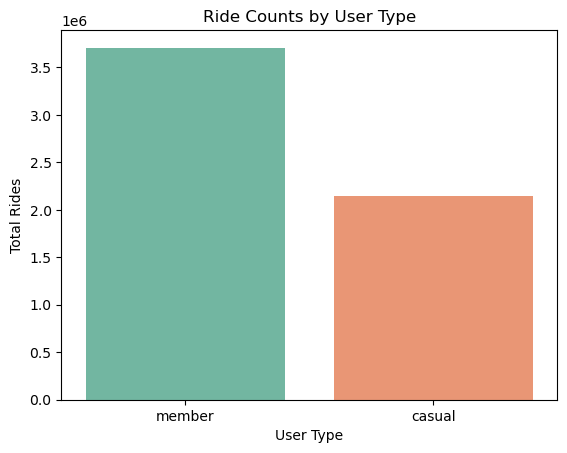

In [14]:
sns.countplot(data=final_df, x='member_casual', palette='Set2')
plt.title("Ride Counts by User Type")
plt.xlabel("User Type")
plt.ylabel("Total Rides")
plt.show()


<p style="font-family:Arial;font-size:15px">From the overall ride activity, it’s clear that members use the service much more than casual riders. There’s a noticeable gap — with members logging over 3.7 million rides compared to just over 2.1 million by casual users. This suggests that member users are more consistent and engaged in their usage.

</p>

#### Average Ride Duration by Day and User Type

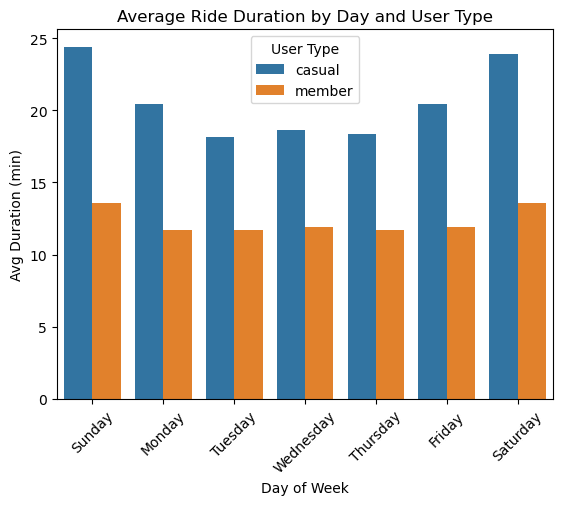

In [15]:
sns.barplot(data=avg_duration_by_day, x='day_of_week', y='avg_ride_duration_min', hue='user_type', palette='tab10')
plt.title("Average Ride Duration by Day and User Type")
plt.xlabel("Day of Week")
plt.ylabel("Avg Duration (min)")
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.show()


<p style="font-family:Arial;font-size:15px">Looking at how long people ride, casual users consistently take longer trips than members. Their ride times spike over the weekend, especially on Saturdays and Sundays, which could point to recreational or leisure riding. Members, on the other hand, tend to ride for shorter durations and have steadier ride patterns across all weekdays — possibly using the service more for commuting.

</p>

#### Bike Type Usage - Casual Users

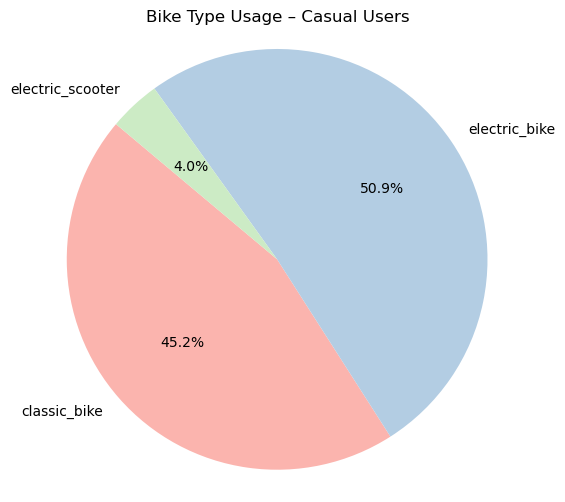

In [16]:
# Filter data for casual users only
casual_data = bike_type_by_user[bike_type_by_user['user_type'] == 'casual']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(casual_data['ride_count'], labels=casual_data['bike_type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Pastel1'))
plt.title('Bike Type Usage – Casual Users')
plt.axis('equal')
plt.show()


<p style="font-family:Arial;font-size:15px">Among casual riders, electric bikes are slightly more popular than classic bikes. Around half of the rides are on electric bikes, followed closely by classic bikes. Interestingly, very few casual users opt for electric scooters — suggesting scooters may not be a preferred option for short-term or leisure use.

</p>

#### Bike Type Usage- Member Users 

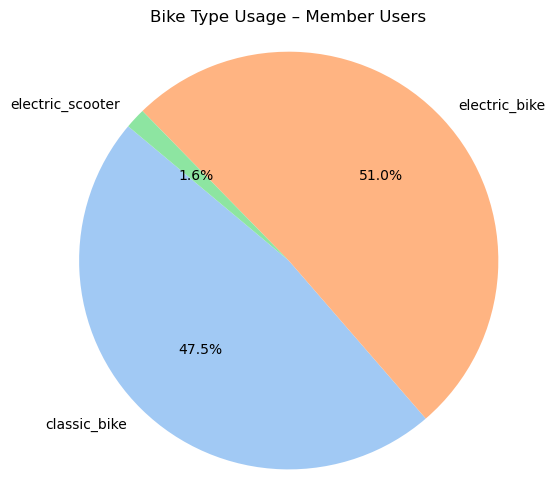

In [17]:
# Filter data for members
member_data = bike_type_by_user[bike_type_by_user['user_type'] == 'member']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(member_data['ride_count'], labels=member_data['bike_type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Bike Type Usage – Member Users')
plt.axis('equal')
plt.show()


<p style="font-family:Arial;font-size:15px">Members show a similar preference trend, favoring electric bikes slightly more than classic bikes. Again, electric scooters make up a very small portion of the rides. This shows that across both groups, bikes (especially electric) are the go-to mode, while scooters are underutilized.


</p>

#### Monthly Ride Counts By User Type

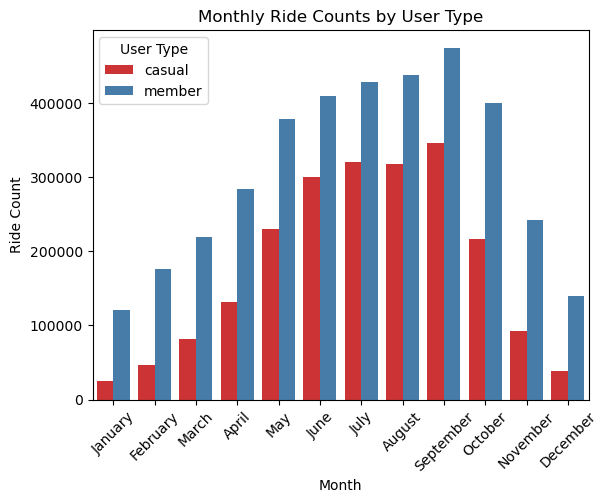

In [18]:
sns.barplot(data=rides_by_month, x='month', y='ride_count', hue='member_casual', palette='Set1')
plt.title("Monthly Ride Counts by User Type")
plt.xlabel("Month")
plt.ylabel("Ride Count")
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.show()


<p style="font-family:Arial;font-size:15px">Rides by both user groups follow a seasonal pattern, increasing during the warmer months. Members tend to ride consistently from May to October, while casual users see the biggest spike during summer — especially in September. This highlights an opportunity to engage more casual users during seasonal peaks.


</p>

#### Average Ride Duration By User Type 

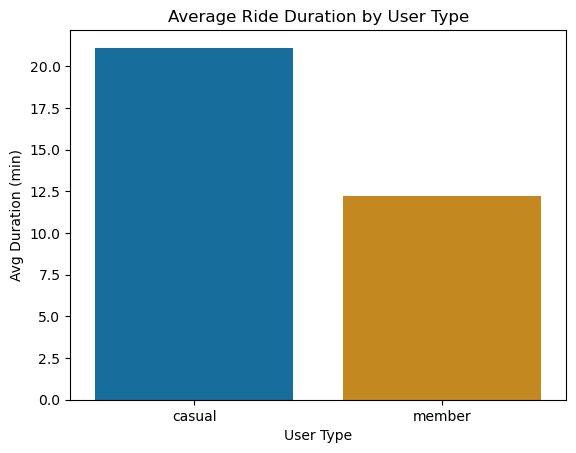

In [19]:
sns.barplot(data=summary_stats, x='member_casual', y='avg_ride_duration_min', palette='colorblind')
plt.title("Average Ride Duration by User Type")
plt.xlabel("User Type")
plt.ylabel("Avg Duration (min)")
plt.show()


<p style="font-family:Arial;font-size:15px">When we compare how long each group rides on average, casual users ride nearly twice as long as members. This reinforces the idea that casual users are likely riding for fun or exploration, while members are using the bikes more for quick trips or daily errands.


</p>

#### Most Popular Day of the Week

In [20]:
import pandas as pd
from IPython.display import display

# Manually create the summary
popular_day_table = pd.DataFrame({
    'User Type': ['Casual', 'Member'],
    'Most Popular Day': ['Saturday', 'Wednesday']
})

# Display the mini table
display(popular_day_table)


,User Type,Most Popular Day
0,Casual,Saturday
1,Member,Wednesday


<p style="font-family:Arial;font-size:15px">Casual riders ride the most on Saturdays, while members show peak activity on Wednesdays. This supports the pattern of casual users riding more on weekends and members being weekday commuters.


</p>